In [15]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv('data/GOOGL_test.csv')
df = df[['date_time', 'close']]
df


,date_time,close
0,2021-03-25 13:30:00+00:00,100.881752
1,2021-03-25 14:30:00+00:00,100.442001
2,2021-03-25 15:30:00+00:00,101.099998
3,2021-03-25 16:30:00+00:00,101.178001
4,2021-03-25 17:30:00+00:00,100.772247
...,...,...
3515,2023-03-24 15:30:00+00:00,104.565002
3516,2023-03-24 16:30:00+00:00,104.695000
3517,2023-03-24 17:30:00+00:00,104.964996
3518,2023-03-24 18:30:00+00:00,105.305000


In [17]:
def strToDatetime(s):
    split_day_month_year = s.split(' ')[0].split('-')
    split_hour_minute_sec = s.split(' ')[1].split('+')[0].split(':')
    year, month, day, hour, minute, second= int(split_day_month_year[0]), int(split_day_month_year[1]), int(split_day_month_year[2]), int(split_hour_minute_sec[0]), int(split_hour_minute_sec[1]), int(split_hour_minute_sec[2])
    return datetime.datetime(year=year, month=month, day=day, hour=hour, minute=minute, second=second)

df['date_time'] = df['date_time'].apply(strToDatetime)
# create the date the index

df.index = df.pop('date_time')
df

,close
date_time,
2021-03-25 13:30:00,100.881752
2021-03-25 14:30:00,100.442001
2021-03-25 15:30:00,101.099998
2021-03-25 16:30:00,101.178001
2021-03-25 17:30:00,100.772247
...,...
2023-03-24 15:30:00,104.565002
2023-03-24 16:30:00,104.695000
2023-03-24 17:30:00,104.964996


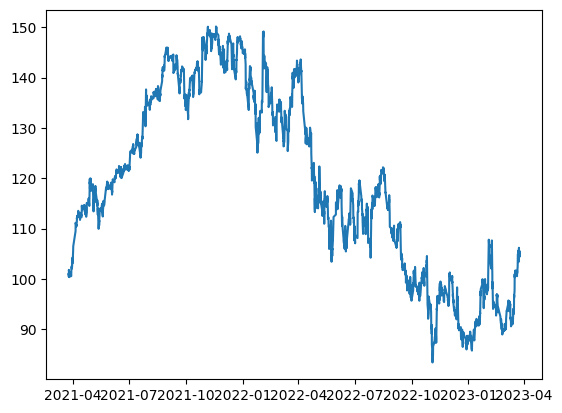

In [18]:
plt.plot(df.index, df['close'])

In [22]:
def dfToWindowedDf(dataframe, first_date_str, last_date_str, n=3):
    first_date = strToDatetime(first_date_str)
    last_date  = strToDatetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        print(len(df_subset))
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        next_date_str_time = next_datetime_str.split('T')[1]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        hour, minute, second = next_date_str_time.split(':')
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year), hour=int(hour), minute=int(minute))
        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = dfToWindowedDf(df, 
                                '2021-03-25 17:30:00', 
                                '2023-03-24 19:30:00', 
                                n=3)
windowed_df


4
2021-03-25 18:30:00
4
2021-03-25 19:30:00
4
2021-03-26 13:30:00
4
2021-03-26 14:30:00
4
2021-03-26 15:30:00
4
2021-03-26 16:30:00
4
2021-03-26 17:30:00
4
2021-03-26 18:30:00
4
2021-03-26 19:30:00
4
2021-03-29 13:30:00
4
2021-03-29 14:30:00
4
2021-03-29 15:30:00
4
2021-03-29 16:30:00
4
2021-03-29 17:30:00
4
2021-03-29 18:30:00
4
2021-03-29 19:30:00
4
2021-03-30 13:30:00
4
2021-03-30 14:30:00
4
2021-03-30 15:30:00
4
2021-03-30 16:30:00
4
2021-03-30 17:30:00
4
2021-03-30 18:30:00
4
2021-03-30 19:30:00
4
2021-03-31 13:30:00
4
2021-03-31 14:30:00
4
2021-03-31 15:30:00
4
2021-03-31 16:30:00
4
2021-03-31 17:30:00
4
2021-03-31 18:30:00
4
2021-03-31 19:30:00
4
2021-04-01 13:30:00
4
2021-04-01 14:30:00
4
2021-04-01 15:30:00
4
2021-04-01 16:30:00
4
2021-04-01 17:30:00
4
2021-04-01 18:30:00
4
2021-04-01 19:30:00
4
2021-04-05 13:30:00
4
2021-04-05 14:30:00
4
2021-04-05 15:30:00
4
2021-04-05 16:30:00
4
2021-04-05 17:30:00
4
2021-04-05 18:30:00
4
2021-04-05 19:30:00
4
2021-04-06 13:30:00
4
2021-04-

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25 17:30:00,100.442001,101.099998,101.178001,100.772247
1,2021-03-25 18:30:00,101.099998,101.178001,100.772247,101.805748
2,2021-03-25 19:30:00,101.178001,100.772247,101.805748,101.622498
3,2021-03-26 13:30:00,100.772247,101.805748,101.622498,101.383003
4,2021-03-26 14:30:00,101.805748,101.622498,101.383003,101.185997
...,...,...,...,...,...
3511,2023-03-24 15:30:00,105.510002,104.980003,104.389999,104.565002
3512,2023-03-24 16:30:00,104.980003,104.389999,104.565002,104.695000
3513,2023-03-24 17:30:00,104.389999,104.565002,104.695000,104.964996
3514,2023-03-24 18:30:00,104.565002,104.695000,104.964996,105.305000


In [23]:
def windowedDfToDateX_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowedDfToDateX_y(windowed_df)

dates.shape, X.shape, y.shape

((3516,), (3516, 3, 1), (3516,))

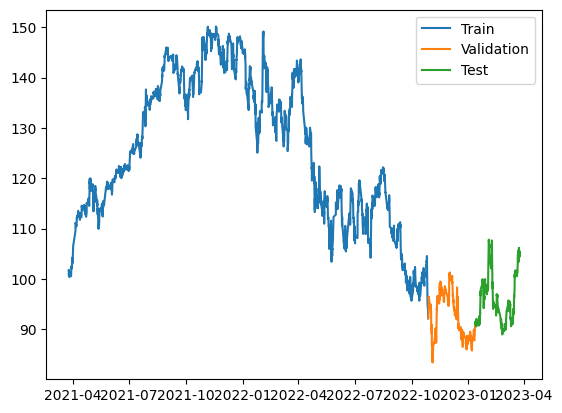

In [24]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
88/88 [==============================] - 6s 9ms/step - loss: 12424.4238 - mean_absolute_error: 109.1597 - val_loss: 674.0640 - val_mean_absolute_error: 25.5245
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 610.4519 - mean_absolute_error: 19.1330 - val_loss: 928.9247 - val_mean_absolute_error: 30.1562
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 144.5859 - mean_absolute_error: 10.3249 - val_loss: 118.8414 - val_mean_absolute_error: 10.7204
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 9.1176 - mean_absolute_error: 2.0671 - val_loss: 6.2023 - val_mean_absolute_error: 2.1460
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 1.7277 - mean_absolute_error: 0.9415 - val_loss: 6.2148 - val_mean_absolute_error: 2.2212
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 1.3505 - mean_absolute_error: 0.8388 - val_loss: 2.7910 - val_mean_absolute_error: 1.4059
E

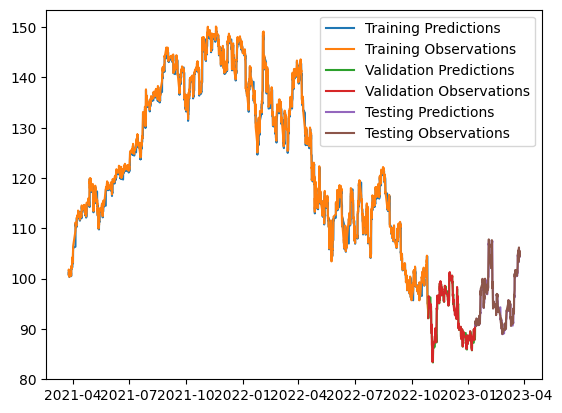

In [29]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [30]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 [==============================] - 0s 18ms/step


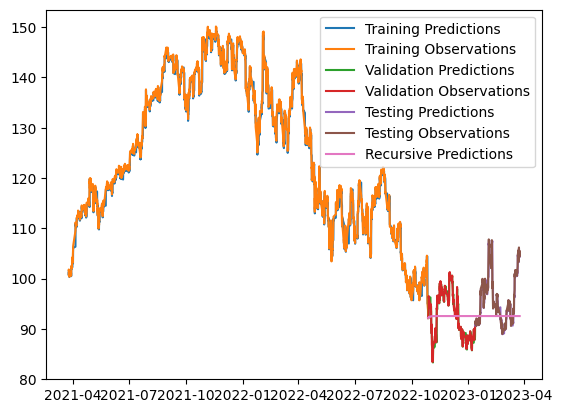

In [31]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

In [32]:
dates_test_list = dates_test
actual_test_vals = df[df.index.isin(dates_test_list)]
actual_test_vals = actual_test_vals.rename(columns={'Close': 'Close Actual'})
actual_test_vals['Close Prediction'] = test_predictions
actual_test_vals

,close,Close Prediction
date_time,,
2023-01-11 19:30:00,91.110001,90.683968
2023-01-11 20:30:00,91.510002,91.030876
2023-01-12 14:30:00,91.510002,91.436508
2023-01-12 15:30:00,91.019997,91.482864
2023-01-12 16:30:00,91.464996,91.047501
...,...,...
2023-03-24 15:30:00,104.565002,104.260780
2023-03-24 16:30:00,104.695000,104.414299
2023-03-24 17:30:00,104.964996,104.548195


In [33]:
print(recursive_predictions)

[array([92.14645], dtype=float32), array([92.19275], dtype=float32), array([92.23354], dtype=float32), array([92.26955], dtype=float32), array([92.301315], dtype=float32), array([92.32937], dtype=float32), array([92.35416], dtype=float32), array([92.376045], dtype=float32), array([92.39539], dtype=float32), array([92.412506], dtype=float32), array([92.42765], dtype=float32), array([92.44105], dtype=float32), array([92.4529], dtype=float32), array([92.46339], dtype=float32), array([92.472664], dtype=float32), array([92.48089], dtype=float32), array([92.48817], dtype=float32), array([92.49461], dtype=float32), array([92.50033], dtype=float32), array([92.50538], dtype=float32), array([92.50986], dtype=float32), array([92.513824], dtype=float32), array([92.51733], dtype=float32), array([92.52044], dtype=float32), array([92.523186], dtype=float32), array([92.52563], dtype=float32), array([92.5278], dtype=float32), array([92.52972], dtype=float32), array([92.53142], dtype=float32), array([92